# Logistic Regression in Python
#### This is a practice of what's on https://youtu.be/C4N3_XJJ-jU
#### Data is from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
#### & https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/
#### (wdbc.data & wdbc.names)

In [1]:
# Read data
import pandas as pd
import numpy as np

BCdata = pd.read_csv('wdbc.data', header=None, usecols=range(0,12),
                     names=['ID_number','Diagnosis','radius','texture','perimeter',
                            'area','smoothness','compactness','concavity','concave_points','symmetry','fractal_dimension'])
# Cursory check
BCdata.head()

,ID_number,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [2]:
# Matrix plot
import seaborn as sns; sns.set(style="ticks", color_codes=True)
# get a few columns of BCdata.
BCdata_small = BCdata.iloc[:,2:]
g = sns.pairplot(BCdata_small)

/home/fastcyclist/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


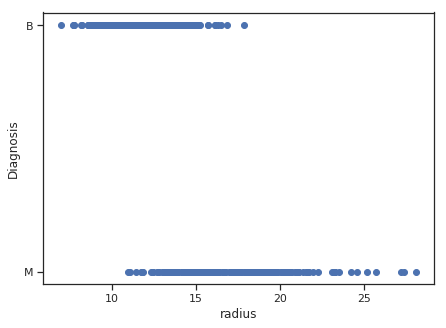

In [3]:
# Plot 'Diagnosis'(y) vs 'radius'(x)
import matplotlib.pyplot as plt

x=BCdata['radius']
y=BCdata['Diagnosis']

fig = plt.figure(figsize=(7,5))
plt.scatter(x,y)
plt.xlabel('radius')
plt.ylabel('Diagnosis')
plt.show()

In [4]:
# This is optional.
#BCdata.loc[BCdata['Diagnosis']=='M','Diagnosis']=1    # Change Malignant to 1
#BCdata.loc[BCdata['Diagnosis']=='B','Diagnosis']=0    # Change Benigh to 0
#BCdata

In [5]:
# Build a logistic regression model to predict Diagnosis using radius.
from sklearn.linear_model import LogisticRegression

x=BCdata['radius'].values.reshape(-1, 1)
y=BCdata['Diagnosis'].values.ravel()
BC_logistic = LogisticRegression(random_state=0, solver='lbfgs').fit(x, y)

In [6]:
# Summary
# Same coefficients from R
print(BC_logistic.intercept_)
print(BC_logistic.coef_)

# sklearn does not provide detailed report like R. No mention of Std. Error, z values, or p values.
# If these values are important, either use R or check out statsmodels package.

# The number of iterations it went through.
print(BC_logistic.n_iter_)

[-15.120902]
[[1.02475609]]
[13]


In [7]:
# Predict y using a new x.

# Predict what radius=7 & 25 would result in
print(BC_logistic.predict([[7], [25]]))

# Probability of Diagnosis being 0 or 1 with radius=7 & 25 [[Pr(0), Pr(1)]]
print(BC_logistic.predict_proba([[7], [25]]))

# Mean accuracy on the given test data and labels.
print(BC_logistic.score(x, y))

['B' 'M']
[[9.99646619e-01 3.53381325e-04]
 [2.75908116e-05 9.99972409e-01]]
0.8787346221441125


# Logistic Regression (multiple features) in Python
#### Unlike the above case, use multiple inputs (x features) to predict a single output (y values).

In [8]:
# Build a logistic regression model to predict Diagnosis using radius.
from sklearn.linear_model import LogisticRegression

x=BCdata.iloc[:,2:12].values
y=BCdata['Diagnosis'].values.ravel()
BC_logistic = LogisticRegression(random_state=0, solver='lbfgs').fit(x, y)

In [9]:
# Summary
# Same coefficients from R
print(BC_logistic.intercept_)
print(BC_logistic.coef_)

# sklearn does not provide detailed report like R. No mention of Std. Error, z values, or p values.
# If these values are important, either use R or check out statsmodels package.

# The number of iterations it went through.
print(BC_logistic.n_iter_)

[-21.21678375]
[[-2.70781209  0.22631006  0.61513574 -0.00406743  0.57866147  0.77905984
   1.31205117  0.85598994  0.67263816  0.11450678]]
[88]


In [10]:
# Predict y using a new x.

# Predict what radius=7, texture=10, perimeter=122, area=1000, smoothness=0.1, compactness=0.27,
#               concavity=0.3, concave_points=0.1, symmetry=0.24, fractal_dimension=0.08 would result in
print(BC_logistic.predict([[7, 10, 122, 1000, 0.1, 0.27, 0.3, 0.1, 0.24, 0.08]]))

# Probability of Diagnosis being 0 or 1 with 
#               radius=7, texture=10, perimeter=122, area=1000, smoothness=0.1, compactness=0.27,
#               concavity=0.3, concave_points=0.1, symmetry=0.24, fractal_dimension=0.08 [[Pr(0), Pr(1)]]
print(BC_logistic.predict_proba([[7, 10, 122, 1000, 0.1, 0.27, 0.3, 0.1, 0.24, 0.08]]))

# Mean accuracy on the given test data and labels.
print(BC_logistic.score(x, y))

['M']
[[1.77635684e-15 1.00000000e+00]]
0.9121265377855887
